<a href="https://colab.research.google.com/github/WanDz03/SMJE3203/blob/main/Wan_CNN_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount The Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Necessary Packages

In [3]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import cv2
from google.colab.patches import cv2_imshow # render the image
import time
#from keras.utils import plot_model
from scipy import ndimage
import scipy


Determine the Path of The Data

The dataset we have downloaded has the following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

We can list the directories with the following terminal command:

We want to design Butterworth Filter

# Answer Question 1

In [5]:
# Question 1
# Initialize path for train and validation data from google drive folder
!ls '/content/drive/MyDrive/Colab Notebooks/AI Project 3203/data_dogcat/train'
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/AI Project 3203/data_dogcat/train'
validation_data_dir = '/content/drive/MyDrive/Colab Notebooks/AI Project 3203/data_dogcat/validation'

cats  dogs


Set CNN Parameters

In [23]:
#Model's Parameter
img_width, img_height = 100, 100 # dimensions of our images.
nb_train_samples = 120
nb_validation_samples = 96
epochs = 50
batch_size = 20
dim = 3 #RGB channel

# Choosing Image Format
if K.image_data_format() == 'channels_first':
    input_shape = (dim, img_width, img_height)
else:
    input_shape = (img_width, img_height, dim)

Define CNN Model




In [24]:
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    #ANN
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

Build CNN Model

In [25]:
# build the model
model = larger_model()

# this is the augmentation configuration we will use for training / from 100 images produce 200
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical')

Found 120 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


Save The Augmented Images

In [26]:
# How to save augmented image in a new folder

# Initialize save path
save_here = '/content/drive/MyDrive/Colab Notebooks/AI Project 3203/augment'

# Initialize file
files = os.listdir(train_data_dir)
print (files)

for f in files:
    print(f)

    # Initialize file
    animal_path = os.listdir(train_data_dir+"/"+f)
    print (animal_path)

    # Loop all image in file
    for i in animal_path:

        # Read an image
        image_path = train_data_dir+"/"+f+"/"+i
        image = cv2.imread(image_path)
        image = np.expand_dims(image, 0)

        # fit the original image
        train_datagen.fit(image)

        # Initialize save path with class name
        save_path = save_here +"/"+ f

        # Create folder if not exist
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        # Split original image name to get initial name
        f_name = i.split('.')
        f_name = f_name[0]+"_"+f_name[1]

        # Loop to create and save 5 augmented image for 1 original image
        for x, val in zip(train_datagen.flow(image,                    #image we chose
            save_to_dir=save_path,     #this is where we figure out where to save
            save_prefix=('{}_aug'.format(f_name)),        # it will save the images as 'aug_0912' some number for every new augmented image
            save_format='jpg'),range(5)) :     # here we define a range because we want 5 augmented images otherwise it will keep looping forever
            pass


['dogs', 'cats']
dogs
['dog.19.jpg', 'dog.1.jpg', 'dog.18.jpg', 'dog.0.jpg', 'dog.47.jpg', 'dog.5.jpg', 'dog.50.jpg', 'dog.48.jpg', 'dog.53.jpg', 'dog.49.jpg', 'dog.46.jpg', 'dog.44.jpg', 'dog.45.jpg', 'dog.52.jpg', 'dog.35.jpg', 'dog.4.jpg', 'dog.37.jpg', 'dog.39.jpg', 'dog.38.jpg', 'dog.51.jpg', 'dog.43.jpg', 'dog.42.jpg', 'dog.41.jpg', 'dog.36.jpg', 'dog.34.jpg', 'dog.32.jpg', 'dog.40.jpg', 'dog.33.jpg', 'dog.31.jpg', 'dog.28.jpg', 'dog.24.jpg', 'dog.27.jpg', 'dog.29.jpg', 'dog.25.jpg', 'dog.26.jpg', 'dog.30.jpg', 'dog.23.jpg', 'dog.22.jpg', 'dog.3.jpg', 'dog.21.jpg', 'dog.20.jpg', 'dog.14.jpg', 'dog.15.jpg', 'dog.17.jpg', 'dog.16.jpg', 'dog.2.jpg', 'dog.12.jpg', 'dog.13.jpg', 'dog.11.jpg', 'dog.10.jpg', 'dog.58.jpg', 'dog.57.jpg', 'dog.6.jpg', 'dog.8.jpg', 'dog.7.jpg', 'dog.59.jpg', 'dog.55.jpg', 'dog.56.jpg', 'dog.9.jpg', 'dog.54.jpg']
cats
['cat.3.jpg', 'cat.26.jpg', 'cat.27.jpg', 'cat.25.jpg', 'cat.24.jpg', 'cat.23.jpg', 'cat.22.jpg', 'cat.29.jpg', 'cat.21.jpg', 'cat.28.jpg', 'c

Compile & Train CNN Model

In [27]:
# Compile Model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# Train Model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50


<ipython-input-27-7770b2f31b60>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


6/6 [==============================] - 4s 549ms/step - loss: 0.7313 - accuracy: 0.5167 - val_loss: 0.6950 - val_accuracy: 0.4625
Epoch 2/50
6/6 [==============================] - 2s 319ms/step - loss: 0.6940 - accuracy: 0.4833 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 3/50
6/6 [==============================] - 2s 322ms/step - loss: 0.7021 - accuracy: 0.5500 - val_loss: 0.6912 - val_accuracy: 0.5500
Epoch 4/50
6/6 [==============================] - 2s 343ms/step - loss: 0.6950 - accuracy: 0.4667 - val_loss: 0.6928 - val_accuracy: 0.5125
Epoch 5/50
6/6 [==============================] - 3s 585ms/step - loss: 0.6866 - accuracy: 0.6583 - val_loss: 0.6923 - val_accuracy: 0.5125
Epoch 6/50
6/6 [==============================] - 2s 308ms/step - loss: 0.6807 - accuracy: 0.5833 - val_loss: 0.6992 - val_accuracy: 0.4500
Epoch 7/50
6/6 [==============================] - 2s 316ms/step - loss: 0.7439 - accuracy: 0.5500 - val_loss: 0.6789 - val_accuracy: 0.5875
Epoch 8/50
6/6 [===============

Plot Train & Validation Performance

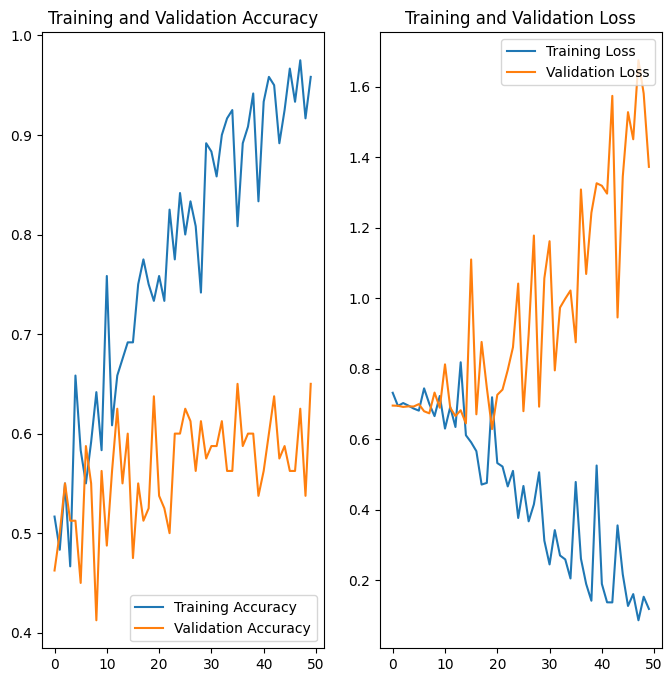

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Save Model

In [29]:
# Question 2
# save the model in your google drive folder
import tensorflow as tf
model.save('/content/drive/MyDrive/Colab Notebooks/AI Project 3203/cnn_image_model.keras')
print("Saved model to disk with hdf5 format")

Saved model to disk with hdf5 format


Load Model

In [30]:
from keras.models import load_model
# Question 3
# load the model from your google drive folder
model_path = '/content/drive/MyDrive/Colab Notebooks/AI Project 3203/cnn_image_model.keras'
loaded_model = load_model(model_path)
print("Loaded model from disk")

Loaded model from disk


Predict The Dataset using The Loaded Model
Question 4

/content/drive/MyDrive/Colab Notebooks/AI Project 3203/data_dogcat/train/cats/cat.1.jpg


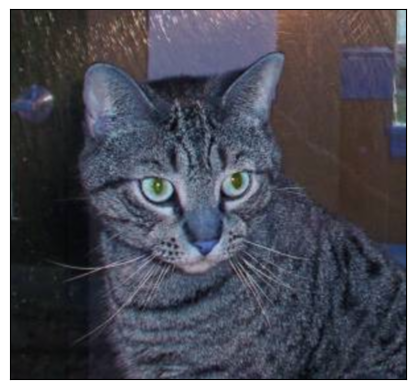

(1, 100, 100, 3)
1/1 [==============================] - 0s 97ms/step
Prediction is: [0]


In [31]:
#filepath = 'drive/Colab-Data/data_dogcat/validation/cats/cat.1004.jpg' # Read Image


# Read an image from google drive folder to test the model

# get any images from train_dir
filepath = '/content/drive/MyDrive/Colab Notebooks/AI Project 3203/data_dogcat/train/cats/cat.1.jpg' # Read Image
print(filepath)
im = cv2.imread(filepath)


#Plot Image
plt.imshow(im, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


#Predict Image
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.resize(im, (img_width, img_height))
im = np.reshape(im, [1, img_width, img_height, dim])
print(im.shape)

# Question 4
# predict the test data and diplay either cat or dog
predicted_probabilities = model.predict(im)

predicted_labels = np.argmax(predicted_probabilities, axis=1)

print("Prediction is:", predicted_labels)


